ID: ASGN2702

Anomaly Detection in Manufacturing Process Data

Objective: Use Isolation Forest to detect anomalies in manufacturing process data.

Dataset: Manufacturing Process Data for Predictive Maintenance

Tasks:
1. Preprocess the data to handle missing values and normalize features.
2. Train an Isolation Forest model to detect anomalies in the manufacturing process.
3. Evaluate the model's performance using appropriate metrics.
4. Visualize the results to show normal vs. anomalous data points in the process.
5. Discuss potential causes of anomalies and recommend actions for process improvement.

Submission Guidelines/Deliverables:
    
- A Jupyter notebook containing:
    - Code for data preprocessing, model training, and evaluation.
    - Comments and explanations for each step.
    - Visualizations of the results.
- A PDF report summarizing the approach, findings, and recommendations for process improvement.
- A README file with instructions on how to run the notebook and any dependencies required.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
mfr_df = pd.read_csv('manufacturing_process_data.csv')
mfr_df

,MachineID,Temperature,Pressure,Vibration,Humidity,RunTime,MaintenanceRequired,FaultCode,LastMaintenance,FailureCount
0,1.0,49.963210,36.908120,3.241285,75.678901,130.861264,1.0,B,01-01-2023,1.0
1,2.0,96.057145,41.867256,0.861932,56.268024,16.006514,1.0,C,01-01-2023,0.0
2,3.0,78.559515,20.018716,4.361973,66.245514,48.465962,0.0,D,01-01-2023,0.0
3,4.0,67.892679,34.994964,3.065581,51.802415,154.735869,1.0,E,01-01-2023,0.0
4,5.0,32.481491,32.869839,0.786019,61.501729,105.737171,0.0,E,01-01-2023,1.0
...,...,...,...,...,...,...,...,...,...,...
2995,2996.0,89.223661,37.377414,2.574647,30.232224,130.176697,1.0,B,05-05-2023,1.0
2996,2997.0,32.581857,30.128817,0.826852,73.683433,35.559668,1.0,C,05-05-2023,1.0
2997,2998.0,44.783029,40.605954,4.888564,45.366259,10.247908,1.0,E,05-05-2023,1.0
2998,2999.0,43.203643,29.411625,0.539623,76.929443,136.592319,0.0,B,05-05-2023,0.0


In [3]:
mfr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MachineID            2955 non-null   float64
 1   Temperature          2964 non-null   float64
 2   Pressure             2961 non-null   float64
 3   Vibration            2952 non-null   float64
 4   Humidity             2960 non-null   float64
 5   RunTime              2954 non-null   float64
 6   MaintenanceRequired  2956 non-null   float64
 7   FaultCode            2957 non-null   object 
 8   LastMaintenance      2951 non-null   object 
 9   FailureCount         2943 non-null   float64
dtypes: float64(8), object(2)
memory usage: 234.5+ KB


In [4]:
mfr_df.describe()

,MachineID,Temperature,Pressure,Vibration,Humidity,RunTime,MaintenanceRequired,FailureCount
count,2955.000000,2964.000000,2961.000000,2952.000000,2960.000000,2954.000000,2956.000000,2943.000000
mean,1499.258206,60.004050,29.746694,2.436838,55.092514,100.016932,0.507104,1.007136
std,867.221931,23.335431,11.486868,1.428544,14.411794,58.111719,0.500034,1.013648
min,1.000000,20.000931,10.001229,0.001205,30.002641,0.240723,0.000000,0.000000
25%,749.500000,39.724259,19.818178,1.206617,42.708433,49.075850,0.000000,0.000000
50%,1496.000000,60.428300,29.527107,2.413469,54.872759,98.709911,1.000000,1.000000
75%,2251.500000,80.373411,39.515399,3.646553,67.747492,152.145351,1.000000,2.000000
max,3000.000000,99.977414,49.982308,4.997303,79.983660,199.961029,1.000000,6.000000


In [5]:
for col in mfr_df.columns:
    print(mfr_df[col].value_counts(), end='\n\n')

MachineID
3000.0    1
1.0       1
2.0       1
3.0       1
4.0       1
         ..
16.0      1
15.0      1
14.0      1
13.0      1
12.0      1
Name: count, Length: 2955, dtype: int64

Temperature
89.713123    1
49.963210    1
96.057145    1
78.559515    1
85.370251    1
            ..
68.089201    1
89.294092    1
24.646689    1
32.479562    1
32.481491    1
Name: count, Length: 2964, dtype: int64

Pressure
15.975265    1
11.783524    1
48.414671    1
10.678765    1
35.806003    1
            ..
43.313215    1
32.869839    1
34.994964    1
20.018716    1
41.867256    1
Name: count, Length: 2961, dtype: int64

Vibration
4.659721    1
3.241285    1
0.861932    1
4.361973    1
3.065581    1
           ..
2.509348    1
4.894737    1
4.018467    1
1.265995    1
3.134165    1
Name: count, Length: 2952, dtype: int64

Humidity
35.357835    1
56.607874    1
30.187255    1
37.091441    1
43.752013    1
            ..
61.501729    1
51.802415    1
66.245514    1
56.268024    1
75.678901    1
Name:

In [6]:
# Analyzing duplicate rows
mfr_df.duplicated().sum()

np.int64(0)

In [7]:
mfr_df[mfr_df.duplicated()]

,MachineID,Temperature,Pressure,Vibration,Humidity,RunTime,MaintenanceRequired,FaultCode,LastMaintenance,FailureCount


In [8]:
mfr_df['MachineID'].duplicated().sum()

np.int64(44)

In [9]:
mfr_df.isna().sum()

MachineID              45
Temperature            36
Pressure               39
Vibration              48
Humidity               40
RunTime                46
MaintenanceRequired    44
FaultCode              43
LastMaintenance        49
FailureCount           57
dtype: int64

In [10]:
mfr_df[mfr_df.isna().sum(axis=1) == 1]

,MachineID,Temperature,Pressure,Vibration,Humidity,RunTime,MaintenanceRequired,FaultCode,LastMaintenance,FailureCount
10,11.0,21.646760,31.954347,4.018467,44.333029,191.966876,1.0,NaN,01-01-2023,0.0
11,12.0,97.592788,21.505309,NaN,48.347892,65.827341,1.0,A,01-01-2023,1.0
24,25.0,56.485599,12.263426,0.453604,55.881947,87.898503,NaN,C,02-01-2023,0.0
26,27.0,35.973903,47.777943,4.373830,58.215053,NaN,1.0,D,02-01-2023,1.0
27,28.0,61.138755,35.669376,0.644513,NaN,113.034651,0.0,D,02-01-2023,2.0
...,...,...,...,...,...,...,...,...,...,...
2973,2974.0,78.755515,44.005309,0.398226,61.129690,32.569315,1.0,NaN,04-05-2023,4.0
2977,2978.0,20.913439,15.996370,3.602169,NaN,41.046785,1.0,B,05-05-2023,1.0
2978,2979.0,76.295982,31.503246,3.218853,53.393496,139.065881,NaN,A,05-05-2023,0.0
2982,2983.0,76.389681,48.414671,3.187227,56.607874,198.094335,0.0,A,NaN,3.0


In [11]:
# Dropping rows with NA values in MachineID
mfr_df = mfr_df.dropna(subset='MachineID')

In [12]:
# Converting LastMaintenance to Date format
mfr_df['LastMaintenance'] = pd.to_datetime(mfr_df['LastMaintenance'], dayfirst=True, errors='coerce')

In [13]:
mfr_df['LastMaintenance'].min(), mfr_df['LastMaintenance'].max()

(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-05-05 00:00:00'))

In [14]:
# Creating new feature with no of days since last maintenance
max_date = mfr_df['LastMaintenance'].max()

mfr_df['DaysSinceLastMaintenance'] = (max_date - mfr_df['LastMaintenance']).dt.days

In [15]:
mfr_df.isna().sum()

MachineID                    0
Temperature                 36
Pressure                    38
Vibration                   48
Humidity                    40
RunTime                     45
MaintenanceRequired         42
FaultCode                   42
LastMaintenance             49
FailureCount                57
DaysSinceLastMaintenance    49
dtype: int64

In [16]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

mfr_df['FaultCode'] = encoder.fit_transform(mfr_df['FaultCode'])

In [17]:
# Imputing NA values with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

na_cols = ['Temperature','Pressure','Vibration','Humidity','RunTime','MaintenanceRequired','FaultCode','FailureCount','DaysSinceLastMaintenance']

mfr_df[na_cols] = imputer.fit_transform(mfr_df[na_cols])

In [18]:
mfr_df.isna().sum()

MachineID                    0
Temperature                  0
Pressure                     0
Vibration                    0
Humidity                     0
RunTime                      0
MaintenanceRequired          0
FaultCode                    0
LastMaintenance             49
FailureCount                 0
DaysSinceLastMaintenance     0
dtype: int64

In [19]:
# Converting data type
mfr_df = mfr_df.astype({col: 'int64' for col in ['MachineID', 'MaintenanceRequired','FaultCode','FailureCount','DaysSinceLastMaintenance']})

In [20]:
mfr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2955 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   MachineID                 2955 non-null   int64         
 1   Temperature               2955 non-null   float64       
 2   Pressure                  2955 non-null   float64       
 3   Vibration                 2955 non-null   float64       
 4   Humidity                  2955 non-null   float64       
 5   RunTime                   2955 non-null   float64       
 6   MaintenanceRequired       2955 non-null   int64         
 7   FaultCode                 2955 non-null   int64         
 8   LastMaintenance           2906 non-null   datetime64[ns]
 9   FailureCount              2955 non-null   int64         
 10  DaysSinceLastMaintenance  2955 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 277.0 KB


In [21]:
cols = mfr_df.columns[1:].tolist()
cols.remove('LastMaintenance')
num_cols = mfr_df.select_dtypes(include='number').columns[1:].tolist()
num_cols.remove('MaintenanceRequired')
num_cols.remove('FaultCode')
cat_cols = ['MaintenanceRequired', 'FaultCode']

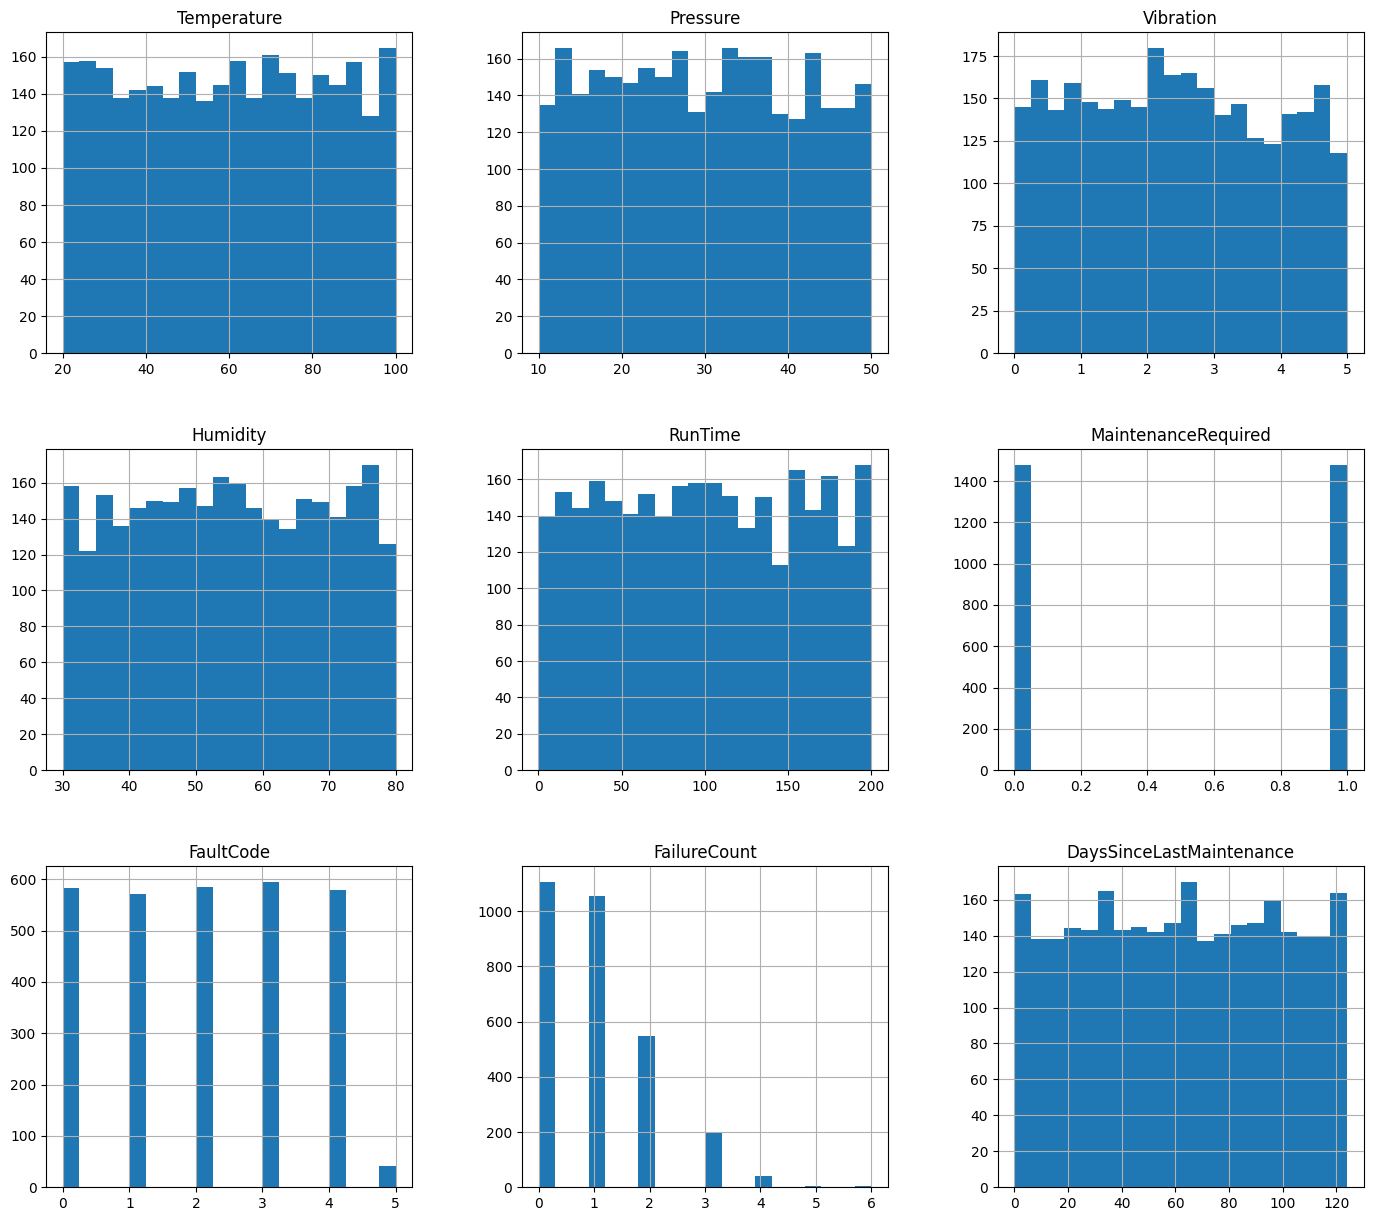

In [22]:
# Histogram of fields
mfr_df[cols].hist(bins=20, figsize=(17, 15))
plt.show()

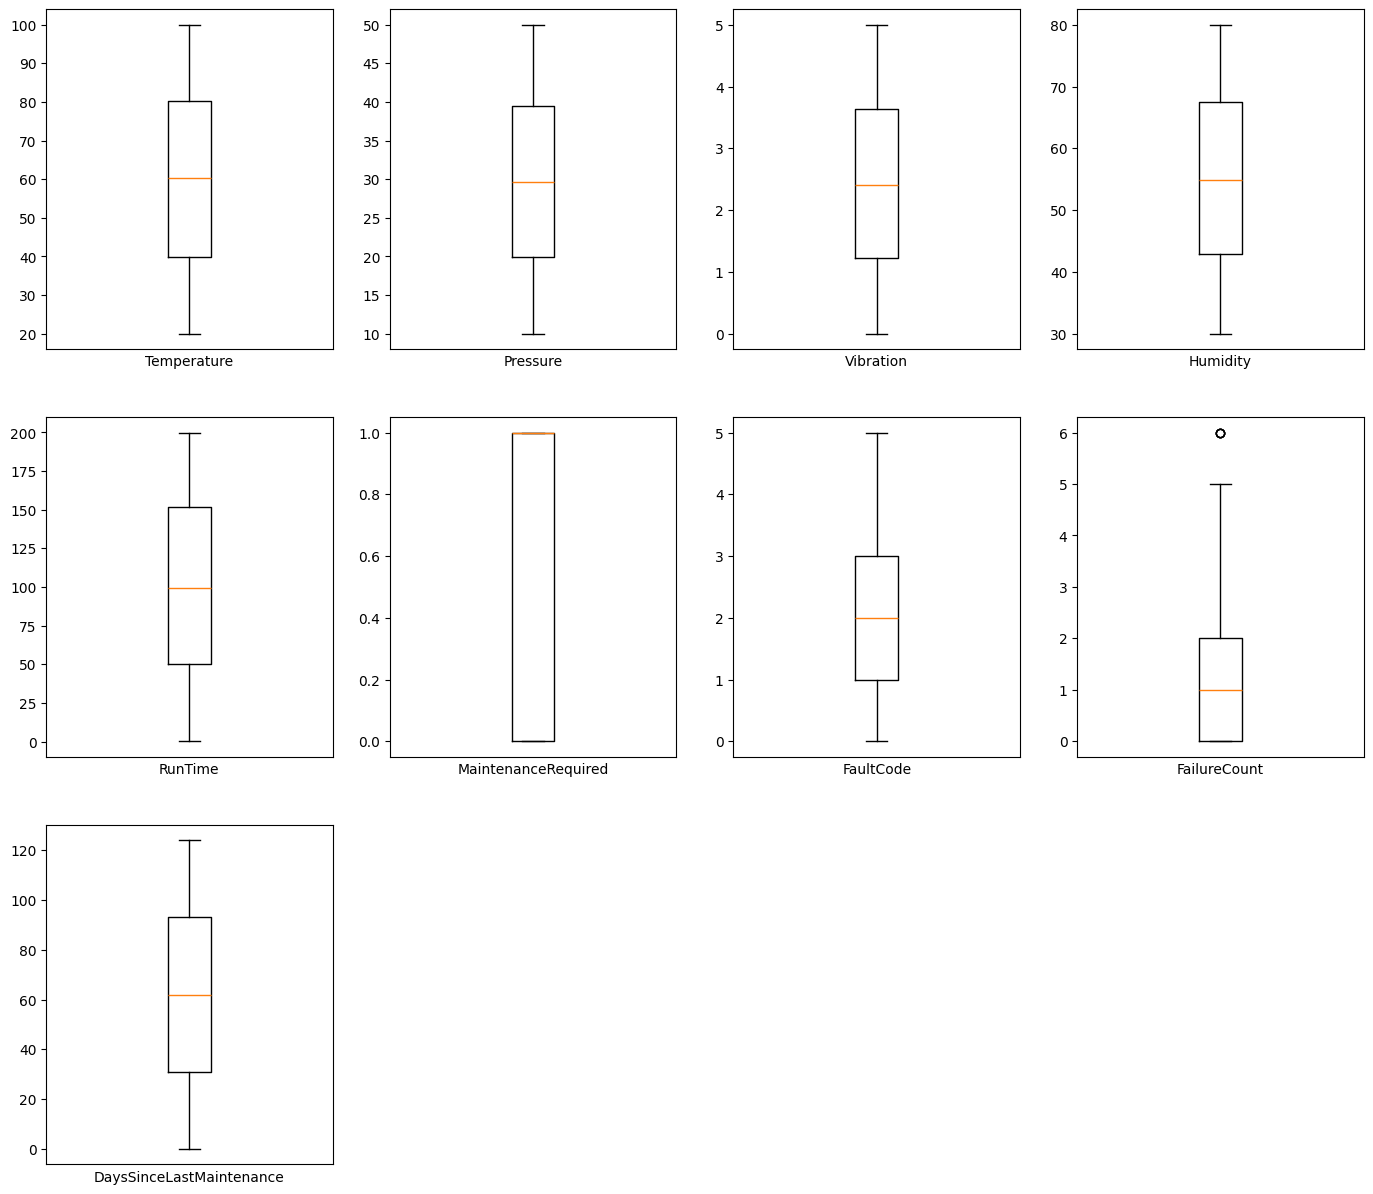

In [23]:
# Distribution of fields
plt.figure(figsize=(17,15))

for i, col in enumerate(cols):
    plt.subplot(3,4,i+1)
    plt.boxplot(x=mfr_df[col])
    plt.xlabel(col)
    plt.xticks([])
plt.show()

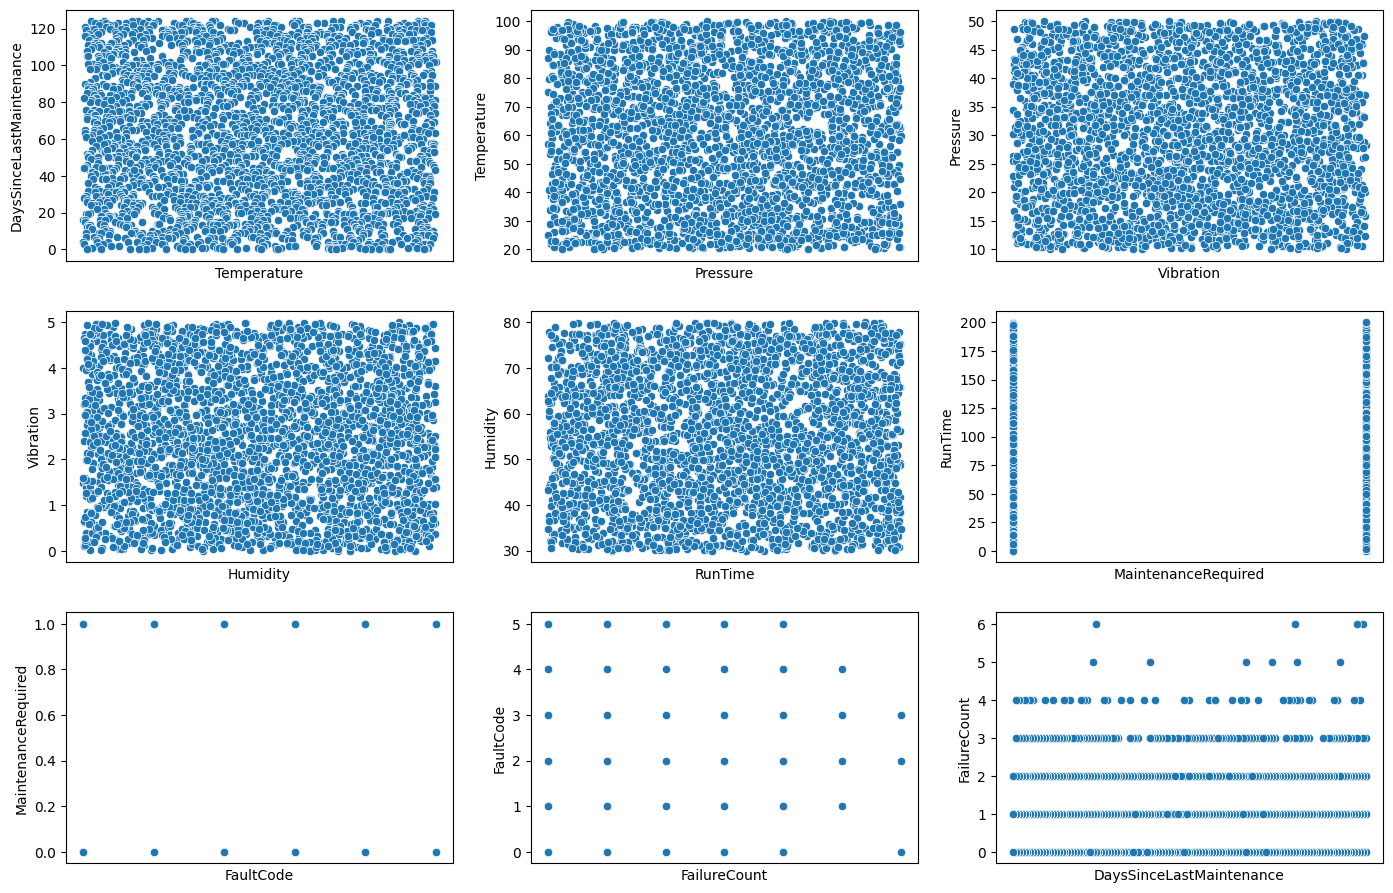

In [24]:
# Correlation with fields
plt.figure(figsize=(17,15))
col2 = cols[-1]

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=mfr_df, x=col, y=col2)
    plt.xlabel(col)
    plt.xticks([])
    col2 = col
plt.show()

<Axes: >

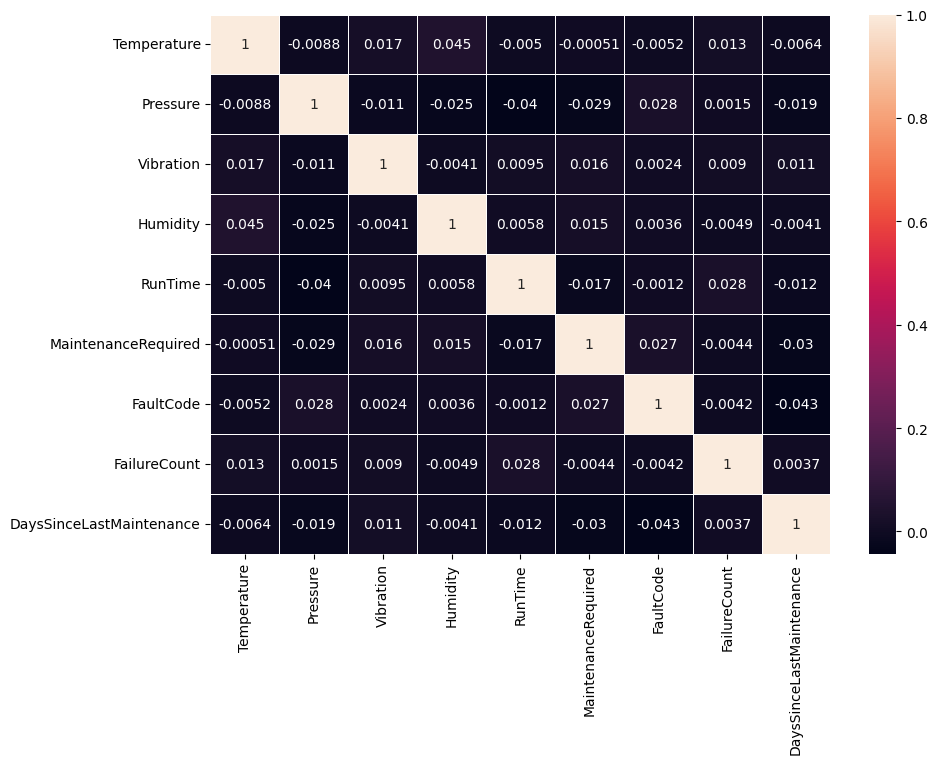

In [25]:
# Correlation between fields
plt.figure(figsize=(10,7))
sns.heatmap(mfr_df[cols].corr(), annot=True, linewidths=0.5)

In [26]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols = ['Temperature', 'Pressure', 'Vibration', 'Humidity', 'RunTime', 'FailureCount', 'DaysSinceLastMaintenance']
scaled_cols = [col+'_scaled' for col in numeric_cols]

mfr_df[scaled_cols] = scaler.fit_transform(mfr_df[numeric_cols])

In [27]:
scaled_cols.extend(['MaintenanceRequired', 'FaultCode'])
X = mfr_df[scaled_cols]

In [28]:
# Performing Anamoly Detection using Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

iso_forest.fit(X)

# -1 for anomaly, 1 for normal
mfr_df['Anomaly'] = iso_forest.predict(X) == -1

<Axes: xlabel='Anomaly', ylabel='count'>

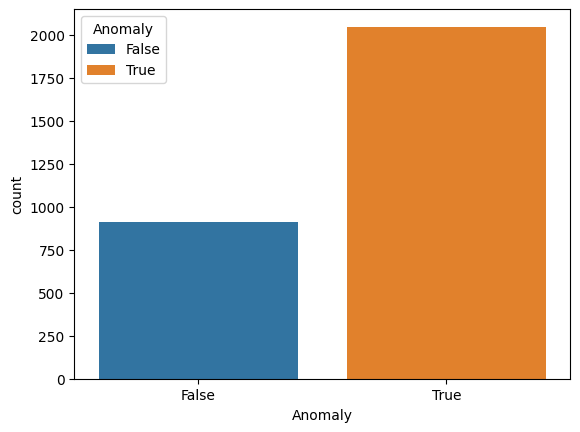

In [29]:
sns.countplot(x=mfr_df['Anomaly'], hue=mfr_df['Anomaly'])

In [30]:
# Classification report for categorical features
from sklearn.metrics import classification_report

cat_cols.append('FailureCount')

for col in cat_cols:
	print(f'{col}: {classification_report(mfr_df[col], mfr_df['Anomaly'])}\n')

MaintenanceRequired:               precision    recall  f1-score   support

           0       0.48      0.29      0.36      1476
           1       0.49      0.68      0.57      1479

    accuracy                           0.49      2955
   macro avg       0.48      0.49      0.47      2955
weighted avg       0.48      0.49      0.47      2955


FaultCode:               precision    recall  f1-score   support

           0       0.09      0.15      0.11       583
           1       0.18      0.63      0.28       572
           2       0.00      0.00      0.00       585
           3       0.00      0.00      0.00       595
           4       0.00      0.00      0.00       578
           5       0.00      0.00      0.00        42

    accuracy                           0.15      2955
   macro avg       0.05      0.13      0.07      2955
weighted avg       0.05      0.15      0.08      2955


FailureCount:               precision    recall  f1-score   support

           0       0.37    

In [31]:
num_cols.remove('FailureCount')

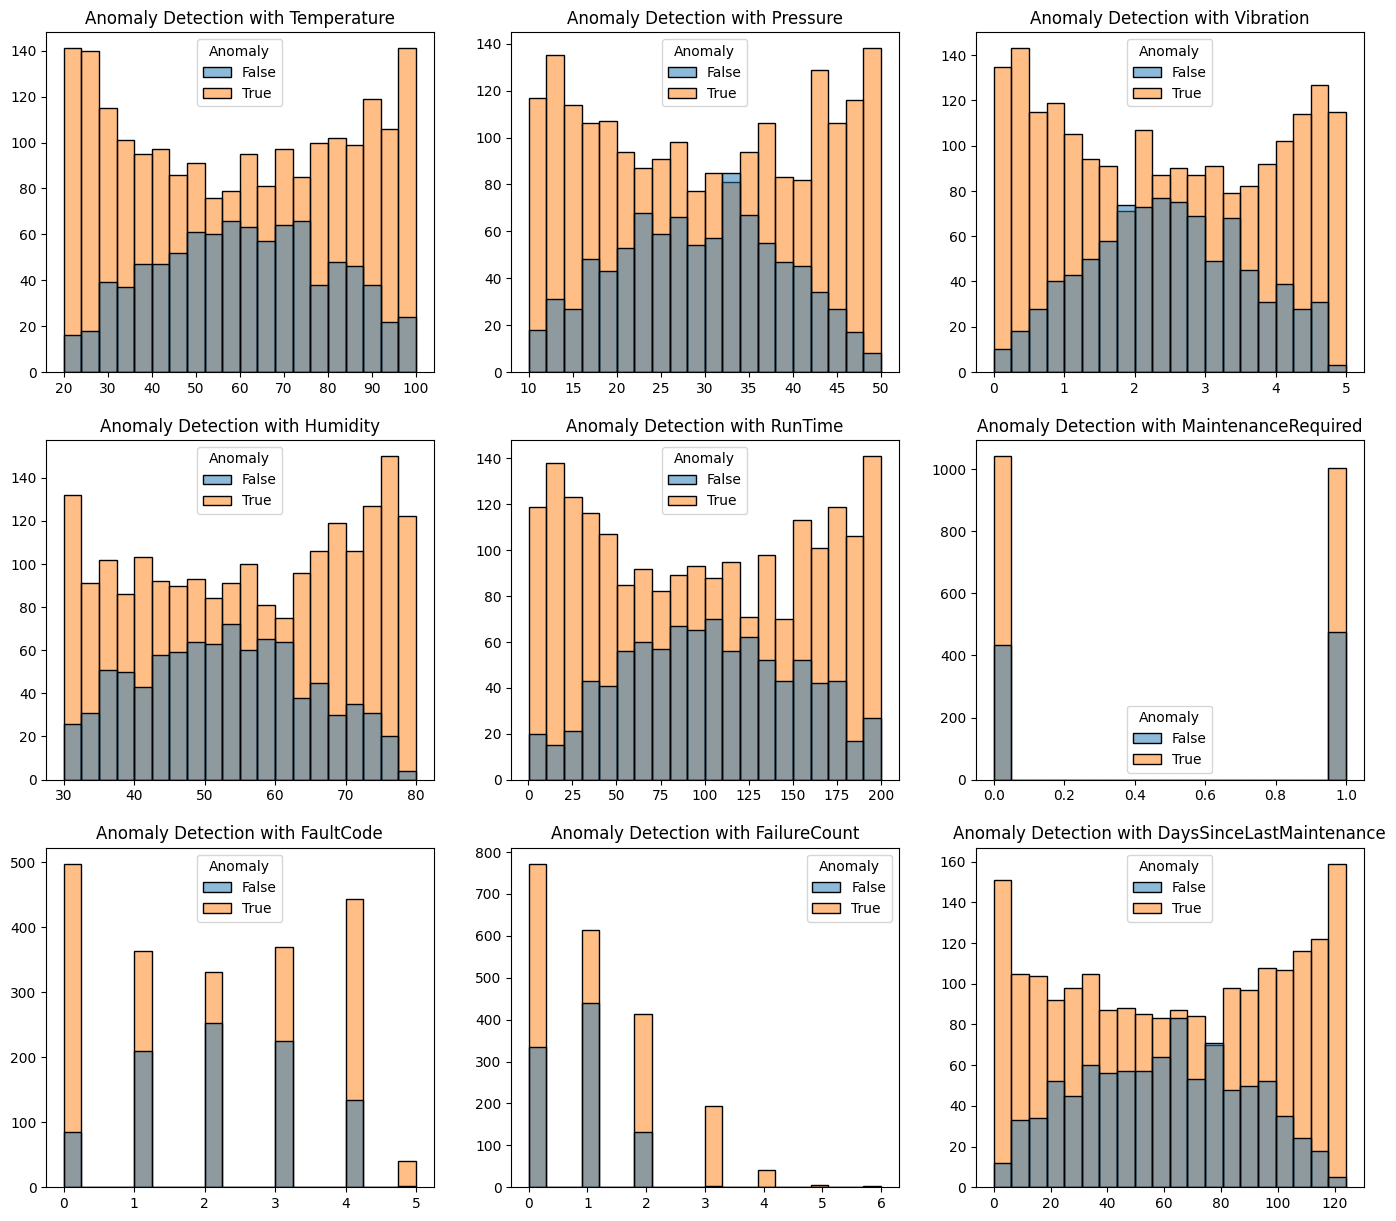

In [32]:
# Scatter plots of numeric features with Anomaly
plt.figure(figsize=(17,15))

for i, col in enumerate(cols):
	plt.subplot(3,3,i+1)
	sns.histplot(x=mfr_df[col], hue=mfr_df['Anomaly'], bins=20)
	plt.title(f'Anomaly Detection with {col}')
	plt.xlabel('')
	plt.ylabel('')
plt.show()

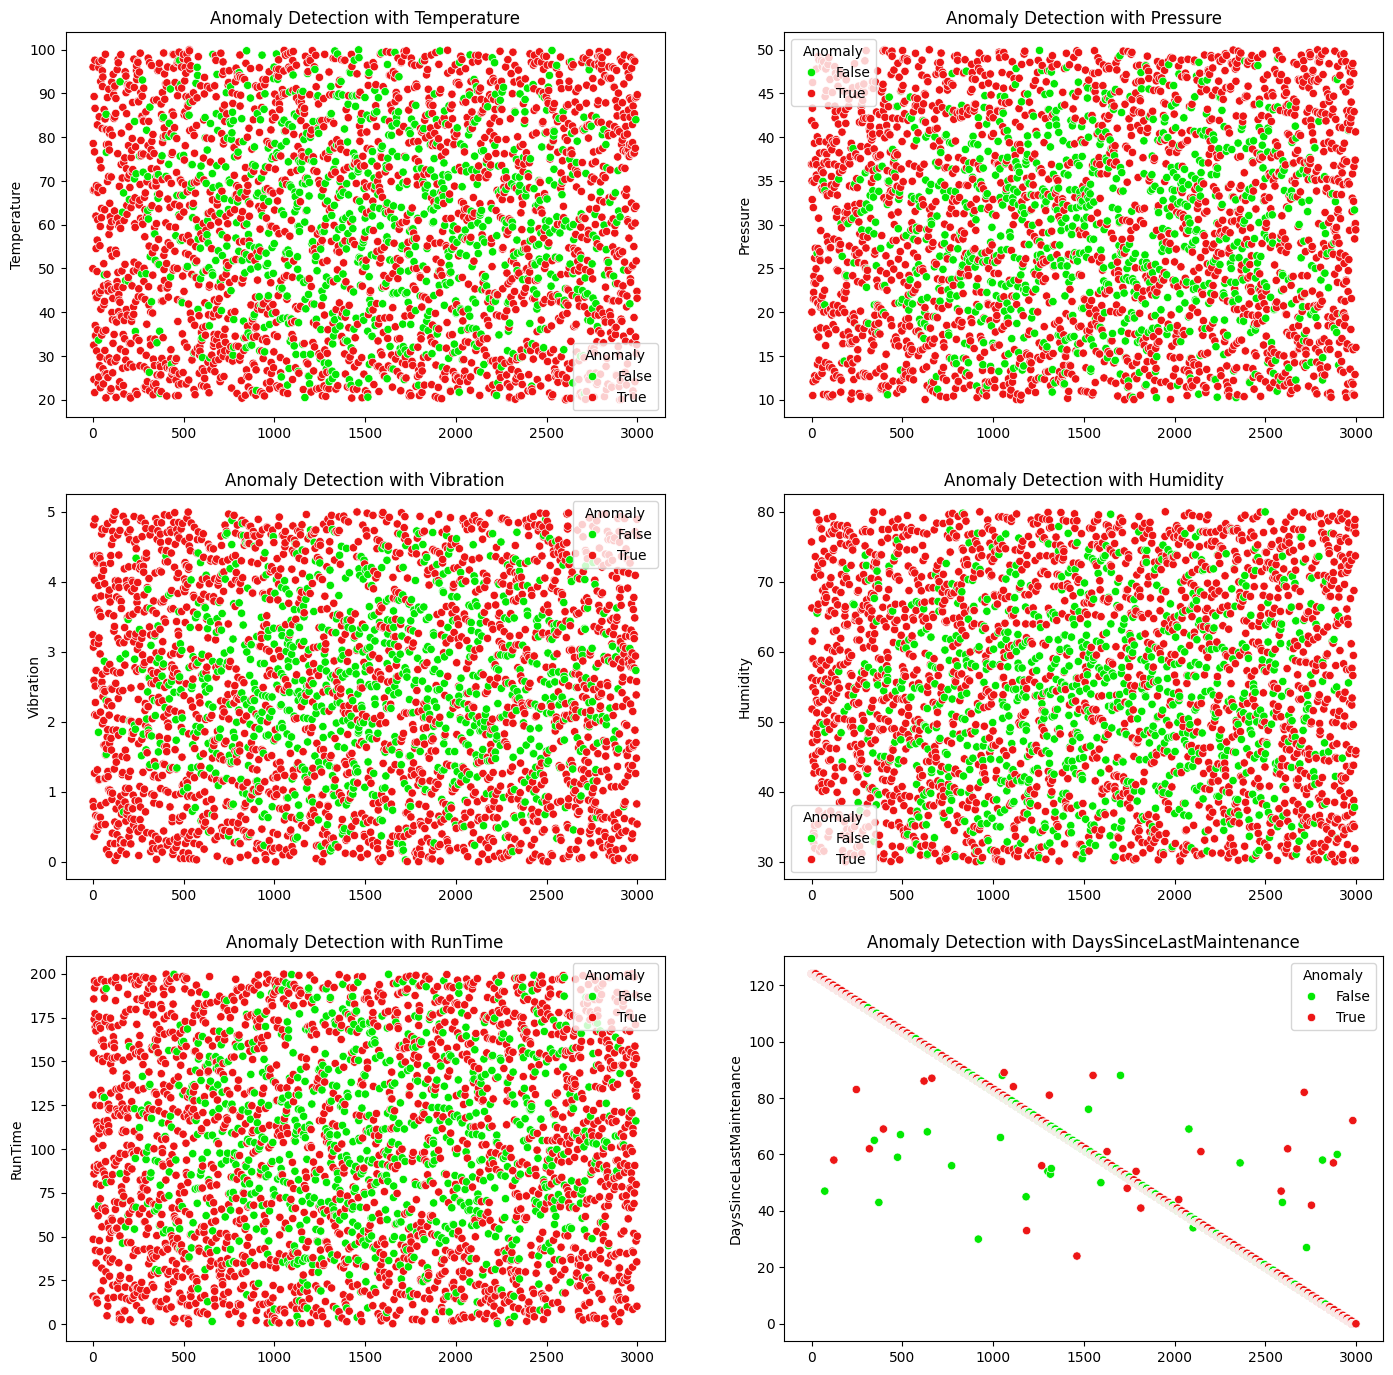

In [33]:
# Scatter plots of numeric features with Anomaly
plt.figure(figsize=(17,17))

for i, col in enumerate(num_cols):
	plt.subplot(3,2,i+1)
	sns.scatterplot(x=mfr_df.index, y=mfr_df[col], hue=mfr_df['Anomaly'], palette={True: "#ED1616", False: "#02E902"})
	plt.title(f'Anomaly Detection with {col}')
	plt.xlabel('')
	plt.ylabel(col)
plt.show()

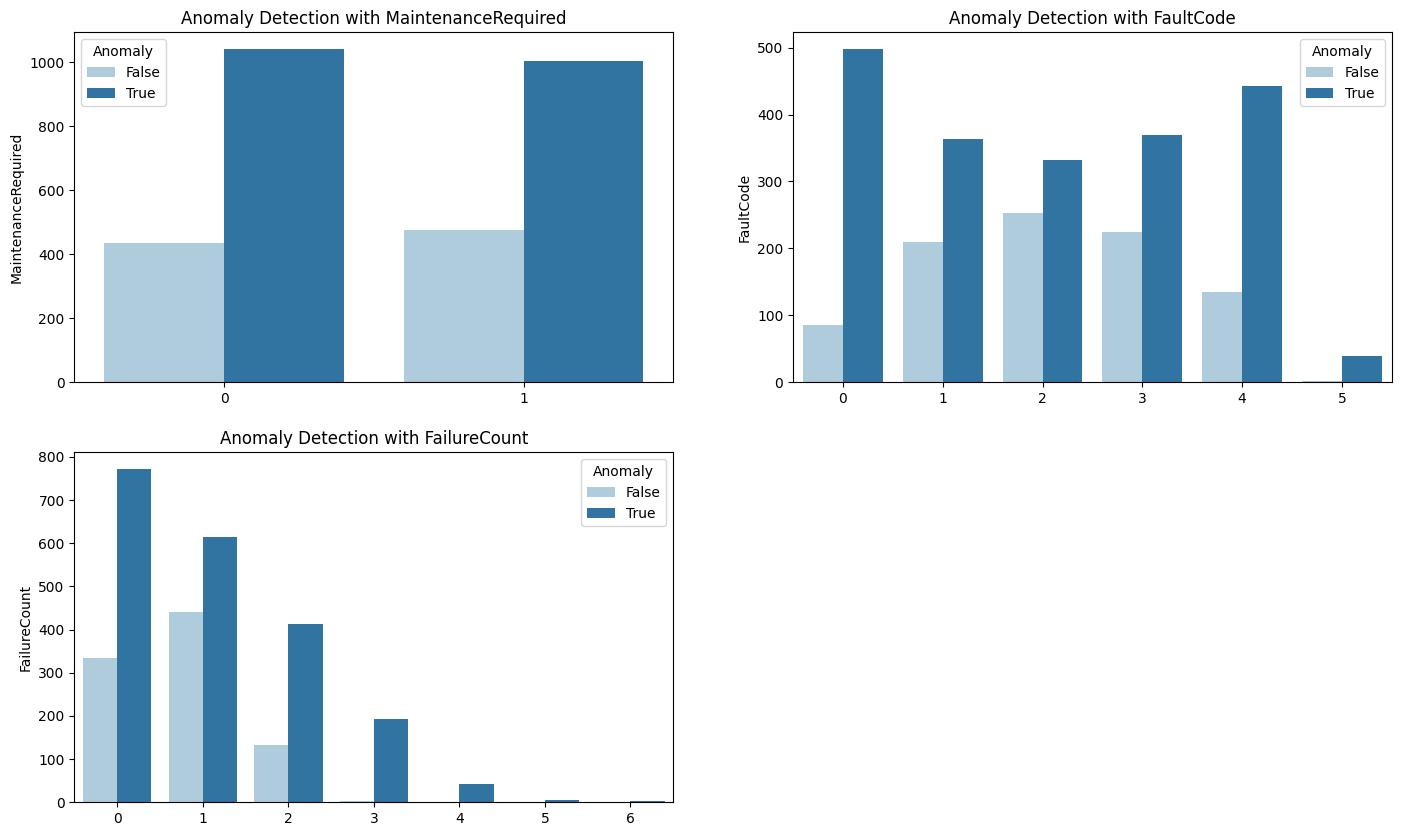

In [34]:
# Count plots of categorical features with Anomaly
plt.figure(figsize=(17,10))

for i, col in enumerate(cat_cols):
	plt.subplot(2,2,i+1)
	sns.countplot(data=mfr_df, x=col, hue='Anomaly', palette='Paired')
	plt.title(f'Anomaly Detection with {col}')
	plt.xlabel('')
	plt.ylabel(col)
plt.show()

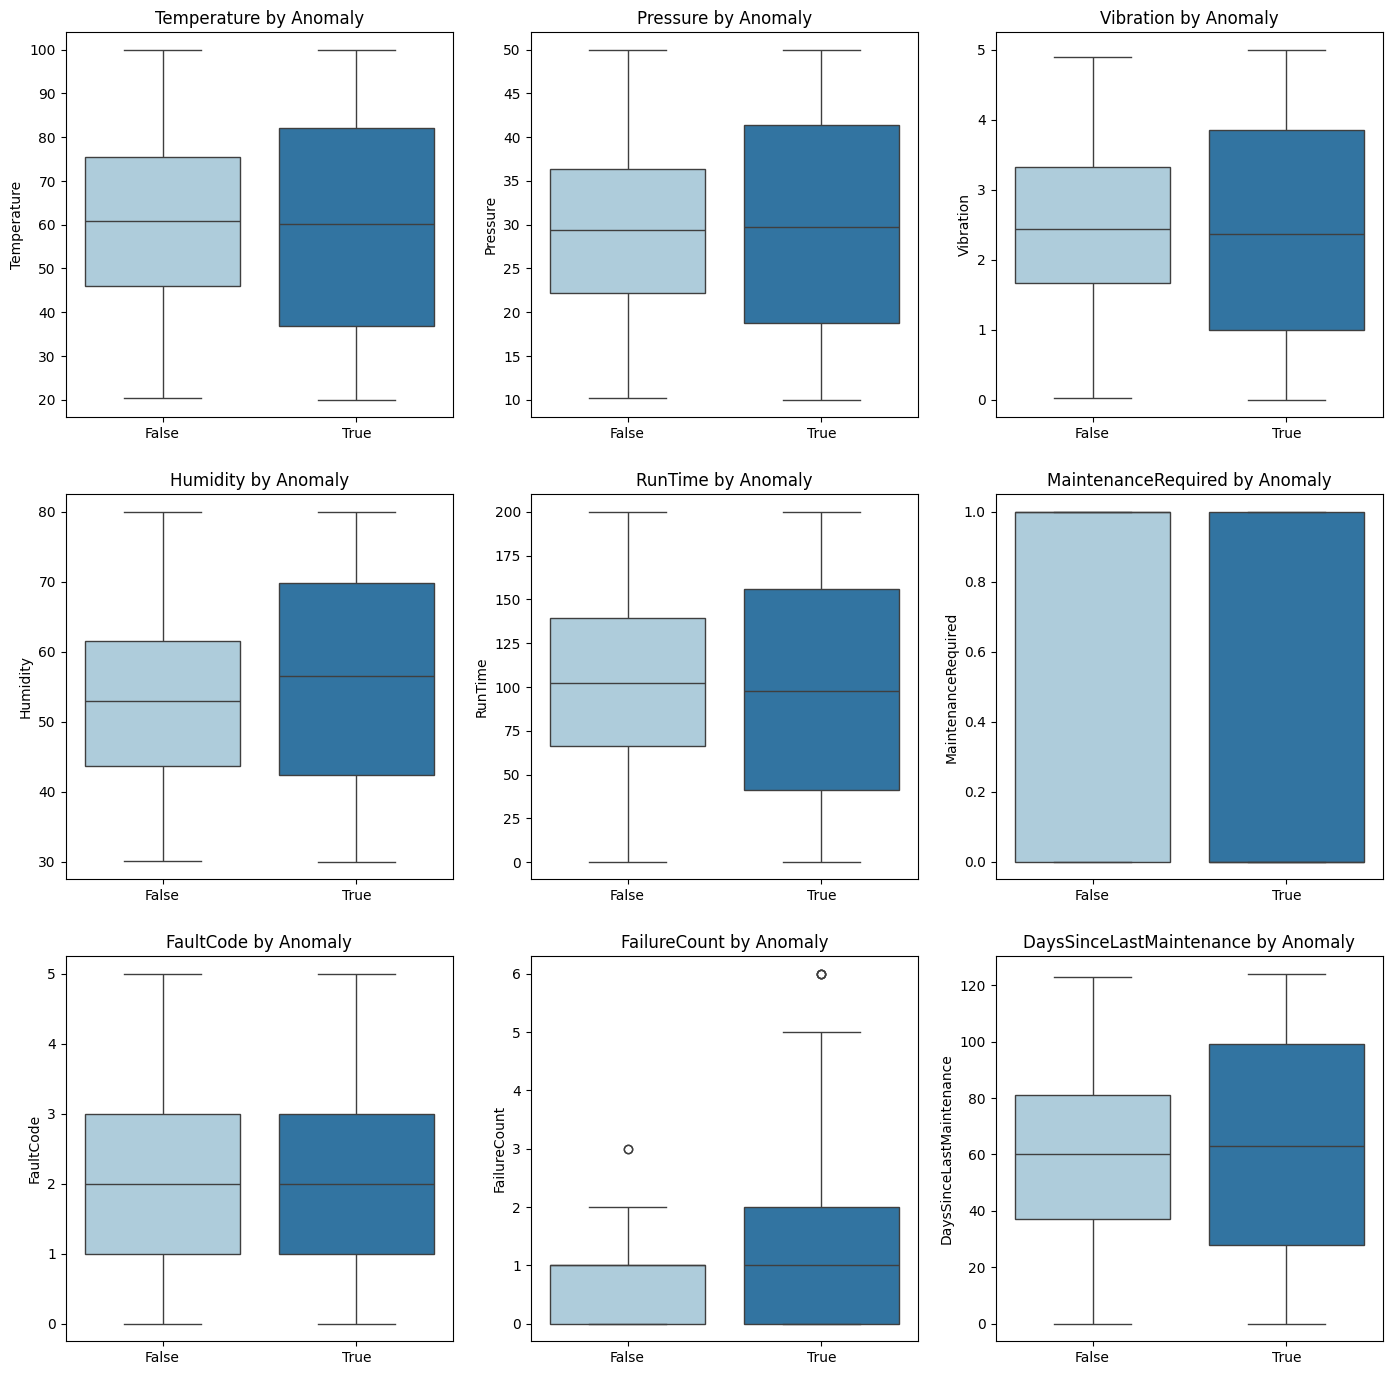

In [35]:
# Distribution of numeric fields with Anomaly
plt.figure(figsize=(17,17))

for i, col in enumerate(cols):
	plt.subplot(3,3,i+1)
	sns.boxplot(data=mfr_df, x='Anomaly', y=col, palette='Paired')
	plt.xlabel('')
	plt.title(f'{col} by Anomaly')
plt.show()

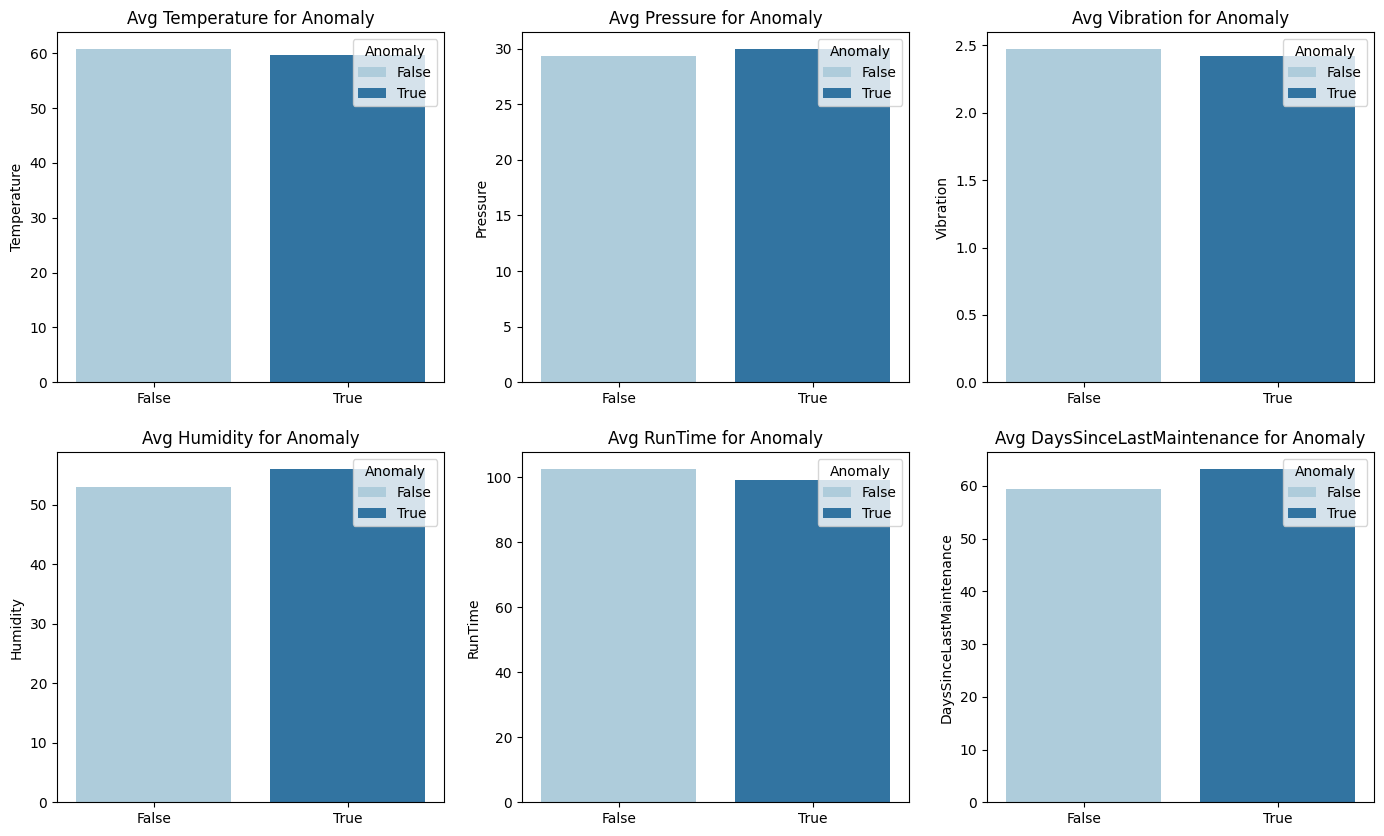

In [36]:
# Average values of categorical features with Anomaly
plt.figure(figsize=(17,10))

for i, col in enumerate(num_cols):
	plt.subplot(2,3,i+1)
	sns.barplot(data=mfr_df, x='Anomaly', y=col, hue='Anomaly', palette='Paired', errorbar=None)
	plt.title(f'Avg {col} for Anomaly')
	plt.xlabel('')
	plt.ylabel(col)
plt.show()

### Potential causes of anomalies and recommend actions for process improvement:

Need to operate machine in optimal conditions, runtime and perform regular maintenance when required

1. **Temperature**: Optimal temperature is between 40 and 80

2. **Pressure**: Optimal pressure is between 20 and 40

3. **Vibration**: Optimal vibration is between 1.5 and 3.5

4. **Humidity**: Optimal humidity is between 45 and 62

5. **MaintananceRequired**: We should perform maintanance when required

6. **FaultCode**: We should perform maintanance when FaultCode is more than 0

7. **FailureCount**: We should perform maintanance when FailureCount is more than 1

8. **DaysSinceLastMaintanence**: Optimal days since maintanance should be less than 60